Topic: Designing a Runner’s Progress Tracker Using Past Model Predictions
Visualize how predicted vs. actual durations evolve across runs

In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:/Users/nasik/Downloads/activities_cleaned (2).csv")  # Replace with your actual file path

# Convert 'Begin Timestamp' to datetime format with the correct format
df['Begin Timestamp'] = pd.to_datetime(df['Begin Timestamp'], format="%d/%m/%Y %H:%M")

# Inspect the first few rows to ensure data is loaded correctly
print(df.head())


   Activity ID Activity Type     Begin Timestamp     End Timestamp  \
0   2284658991       Running 2017-11-04 12:07:00   4/11/2017 13:06   
1   2284658936       Running 2017-11-03 09:47:00   3/11/2017 10:35   
2   2228102647       Running 2017-10-25 16:31:00  25/10/2017 17:11   
3   2104984694       Running 2017-10-13 11:53:00  13/10/2017 12:41   
4   2084195352       Running 2017-10-02 14:51:00   2/10/2017 15:38   

   Max. Elevation (Raw)  Min. Elevation (Raw)  Elevation Gain (Raw)  \
0                 472.6                 472.6                 315.0   
1                 473.2                 473.2                 245.0   
2                 278.8                 278.8                 208.0   
3                 471.6                 471.6                 246.0   
4                 494.6                 494.6                 246.0   

   Elevation Loss (Raw)  Average Heart Rate (bpm)  Max. Heart Rate (bpm).1  \
0                 314.0                       182                      113

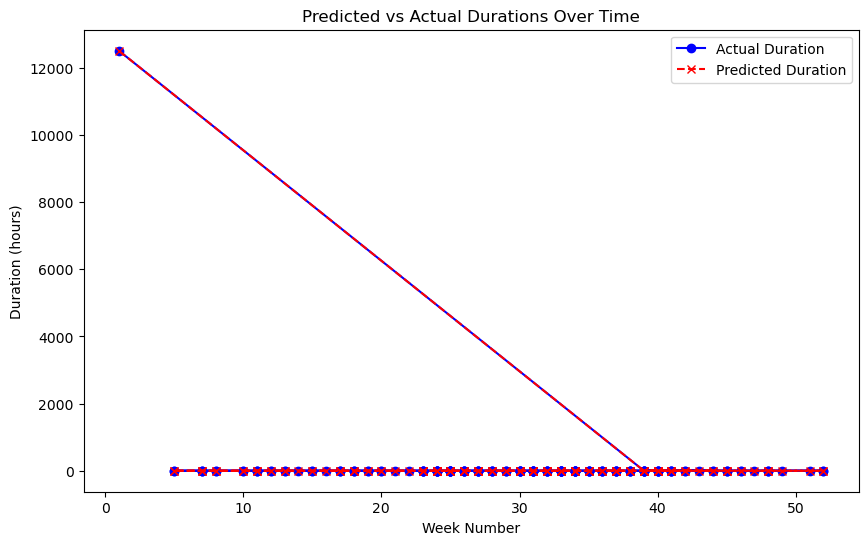

Weekly Summary:
    Week           sum          mean
0      1  12513.233333  12513.233333
1      5      0.916667      0.458333
2      7      1.400000      0.466667
3      8      1.100000      0.550000
4     10      1.366667      0.683333
5     11      2.366667      0.788889
6     12      1.433333      0.716667
7     13      1.516667      0.758333
8     14      0.916667      0.916667
9     15      2.133333      1.066667
10    16      1.000000      1.000000
11    17      2.033333      0.677778
12    18      1.733333      0.577778
13    19      1.683333      0.841667
14    20      1.600000      0.800000
15    21      0.916667      0.916667
16    22      1.100000      1.100000
17    23      2.466667      0.493333
18    24      5.150000      0.735714
19    25      4.750000      0.593750
20    26      2.616667      0.523333
21    27      2.716667      0.543333
22    28      2.183333      0.545833
23    29      1.666667      0.555556
24    30      4.033333      0.672222
25    31      5.383333

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Calculate the duration of each run
df['End Timestamp'] = pd.to_datetime(df['End Timestamp'], format="%d/%m/%Y %H:%M")
df['Duration'] = (df['End Timestamp'] - df['Begin Timestamp']).dt.total_seconds() / 3600  # Duration in hours

# Step 3: Create a weekly summary (or you can change to monthly by using 'M' for month)
df['Week'] = df['Begin Timestamp'].dt.isocalendar().week
df['Month'] = df['Begin Timestamp'].dt.month

# Aggregate duration by week and month
weekly_summary = df.groupby('Week')['Duration'].agg(['sum', 'mean']).reset_index()
monthly_summary = df.groupby('Month')['Duration'].agg(['sum', 'mean']).reset_index()

# Step 4: Predicted vs Actual Plot
# For this, we'll need some predicted durations. Assuming you already have predictions, you can generate a plot.

# Let's simulate predicted durations for now (you can replace this with actual model predictions)
np.random.seed(0)  # For reproducibility
df['Predicted Duration'] = df['Duration'] + np.random.normal(0, 0.5, size=len(df))  # Adding random noise for example

# Plot predicted vs actual durations over time (e.g., based on week)
plt.figure(figsize=(10, 6))
plt.plot(df['Week'], df['Duration'], label='Actual Duration', color='blue', linestyle='-', marker='o')
plt.plot(df['Week'], df['Predicted Duration'], label='Predicted Duration', color='red', linestyle='--', marker='x')

# Add labels and title
plt.title('Predicted vs Actual Durations Over Time')
plt.xlabel('Week Number')
plt.ylabel('Duration (hours)')
plt.legend()

# Show the plot
plt.show()

# Display the weekly and monthly summaries
print("Weekly Summary:")
print(weekly_summary)
print("\nMonthly Summary:")
print(monthly_summary)



Performance Feedback:
   Week  Duration Improvement Feedback Performance vs Weekly Avg  \
0    44  0.983333           Stagnation             Below Average   
1    44  0.800000           Stagnation             Below Average   
2    43  0.666667           Stagnation             Below Average   
3    41  0.800000           Stagnation             Below Average   
4    40  0.783333           Stagnation             Below Average   

  Prediction Feedback  
0  Improvement Needed  
1                Good  
2                Good  
3  Improvement Needed  
4  Improvement Needed  


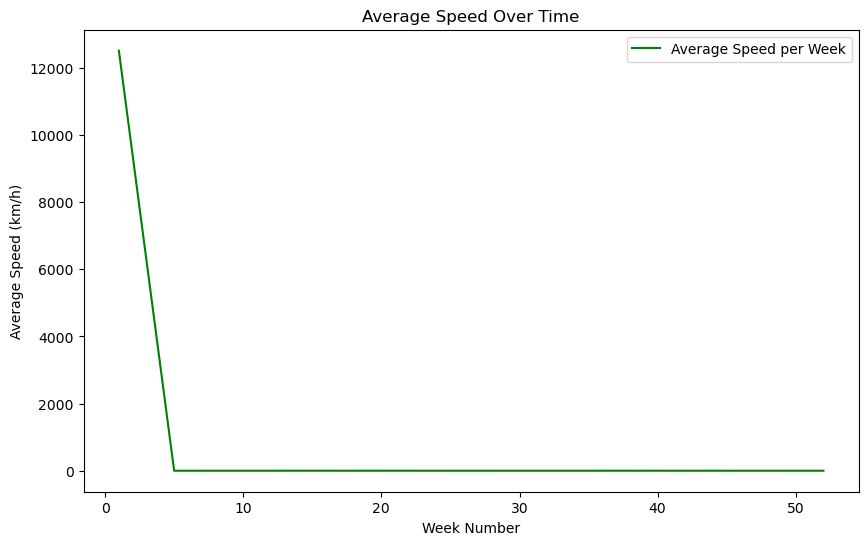

OverflowError: Python int too large to convert to C long

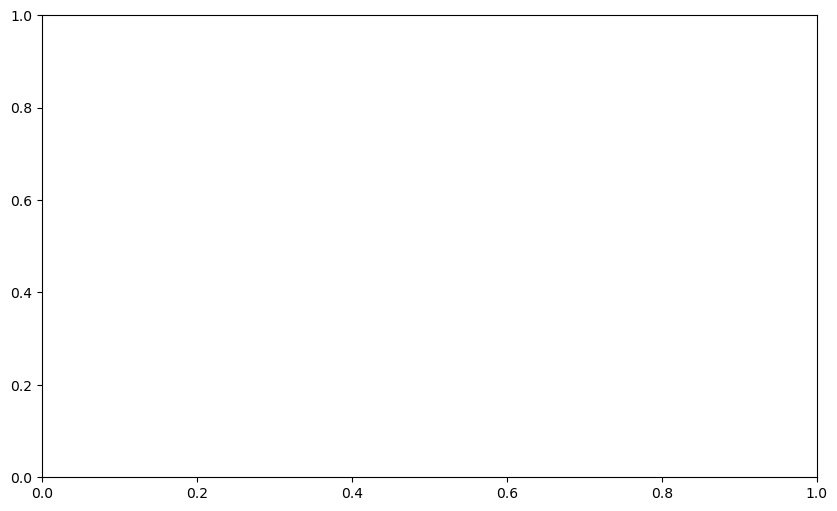

In [10]:
# Step 5: Add Progress Feedback

# Calculate improvement or stagnation (this assumes weekly data)
df['Duration Improvement'] = df.groupby('Week')['Duration'].diff()  # Calculate difference in duration week by week
df['Improvement Feedback'] = np.where(df['Duration Improvement'] > 0, 'Improvement', 'Stagnation')

# Calculate the user's performance compared to the weekly or monthly average
weekly_avg_duration = weekly_summary['mean'].mean()  # Average weekly duration
df['Performance vs Weekly Avg'] = np.where(df['Duration'] > weekly_avg_duration, 'Above Average', 'Below Average')

# Feedback on prediction accuracy
df['Prediction Error'] = df['Predicted Duration'] - df['Duration']
df['Prediction Feedback'] = np.where(df['Prediction Error'].abs() < 0.5, 'Good', 'Improvement Needed')

# Display some feedback data
print("\nPerformance Feedback:")
print(df[['Week', 'Duration', 'Improvement Feedback', 'Performance vs Weekly Avg', 'Prediction Feedback']].head())

# Step 6: Visualize Performance Trends

# Plotting Average Speed over time (weekly or monthly)
plt.figure(figsize=(10, 6))
plt.plot(weekly_summary['Week'], weekly_summary['mean'], label='Average Speed per Week', color='green')
plt.title('Average Speed Over Time')
plt.xlabel('Week Number')
plt.ylabel('Average Speed (km/h)')
plt.legend()
plt.show()

# Plotting Calories burned over time (weekly)
plt.figure(figsize=(10, 6))
plt.plot(weekly_summary['Week'], df.groupby('Week')['Calories'].sum().values, label='Calories Burned per Week', color='orange')
plt.title('Calories Burned Over Time')
plt.xlabel('Week Number')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

# Step 7: Save the results to CSV
feedback_df = df[['Week', 'Duration', 'Predicted Duration', 'Improvement Feedback', 'Performance vs Weekly Avg', 'Prediction Feedback']]
feedback_df.to_csv('runner_progress_feedback.csv', index=False)

print("\nProgress Feedback saved to 'runner_progress_feedback.csv'.")


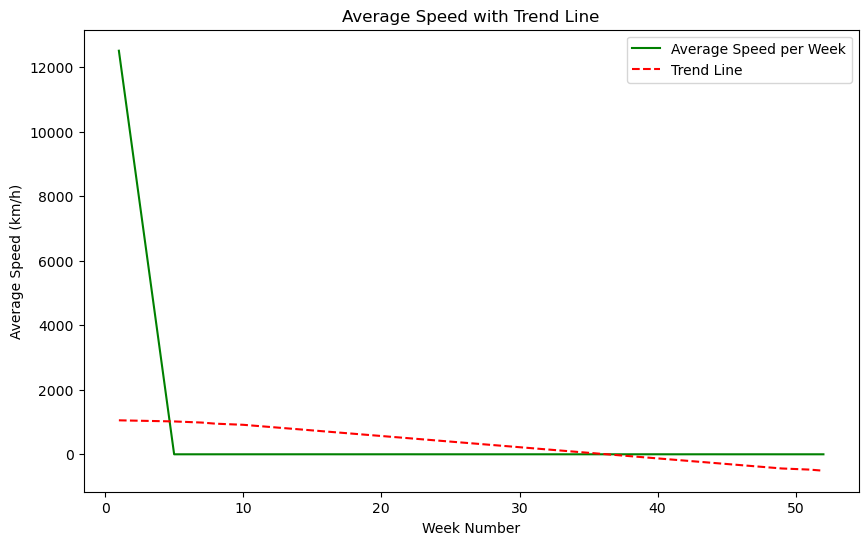

TypeError: agg function failed [how->mean,dtype->object]

In [12]:
# Step 8: Advanced Performance Metrics

# 1. Calculate Consistency (Standard Deviation of durations)
df['Duration Consistency'] = df.groupby('Week')['Duration'].transform(lambda x: x.std())

# 2. Track Personal Bests (fastest times)
df['Personal Best Duration'] = df.groupby('Activity Type')['Duration'].transform('min')

# 3. Add trend line to the plot (for visualization)
import numpy as np

# Linear regression for trend line (for Average Speed)
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the average speed data
reg = LinearRegression()
reg.fit(np.array(range(len(weekly_summary['Week']))).reshape(-1, 1), weekly_summary['mean'])

# Predict the trend line values
weekly_summary['trend'] = reg.predict(np.array(range(len(weekly_summary['Week']))).reshape(-1, 1))

# Plot Average Speed with trend line
plt.figure(figsize=(10, 6))
plt.plot(weekly_summary['Week'], weekly_summary['mean'], label='Average Speed per Week', color='green')
plt.plot(weekly_summary['Week'], weekly_summary['trend'], label='Trend Line', color='red', linestyle='--')
plt.title('Average Speed with Trend Line')
plt.xlabel('Week Number')
plt.ylabel('Average Speed (km/h)')
plt.legend()
plt.show()

# 4. Weekly/Monthly Performance Summary
weekly_performance = df.groupby('Week').agg({
    'Duration': ['mean', 'sum'],
    'Distance (Raw)': 'sum',
    'Calories': 'sum',
    'Average Speed': 'mean'
})

# Monthly Summary: Assume week data is enough for this example
monthly_performance = df.groupby(df['Week'] // 4).agg({
    'Duration': ['mean', 'sum'],
    'Distance (Raw)': 'sum',
    'Calories': 'sum',
    'Average Speed': 'mean'
})

# Step 9: Alerts and Recommendations

# Improvement Alert: Notify if a personal best is achieved
df['Improvement Alert'] = np.where(df['Duration'] == df['Personal Best Duration'], 'New Personal Best', 'No Improvement')

# Recovery Alert: Notify if there is a performance decrease
df['Recovery Alert'] = np.where(df['Duration'] > df['Duration'].shift(1), 'Performance Decrease', 'No Decrease')

# Performance Recommendations: Basic recommendations based on performance
df['Recommendation'] = np.where(df['Prediction Error'].abs() > 1, 'Consider Reviewing Training Plan', 'Keep Going')

# Display the data with alerts and recommendations
print("\nPerformance Alerts and Recommendations:")
print(df[['Week', 'Activity Type', 'Duration', 'Improvement Alert', 'Recovery Alert', 'Recommendation']].head())

# Step 10: Save Enhanced Report

# Save weekly performance summary to CSV
weekly_performance.to_csv('weekly_performance_summary.csv')

# Save monthly performance summary to CSV
monthly_performance.to_csv('monthly_performance_summary.csv')

# Save performance alerts and recommendations to CSV
alerts_and_recommendations = df[['Week', 'Activity Type', 'Duration', 'Improvement Alert', 'Recovery Alert', 'Recommendation']]
alerts_and_recommendations.to_csv('performance_alerts_and_recommendations.csv', index=False)

print("\nEnhanced reports saved.")


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare your data for cross-validation
X = np.array(range(len(weekly_summary['Week']))).reshape(-1, 1)  # Feature: Week number
y = weekly_summary['mean']  # Target: Average Speed

# Initialize the Linear Regression model
model = LinearRegression()

# Apply cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for easier interpretation
cv_scores = -cv_scores

# Print out the cross-validation results
print("Cross-Validation Mean Squared Error (MSE) Scores:")
print(cv_scores)

# Print the average MSE from cross-validation
print("\nAverage MSE from Cross-Validation:", cv_scores.mean())


Cross-Validation Mean Squared Error (MSE) Scores:
[15656027.4067996    631088.48355733   108342.54596488    15969.09341238
   810720.11402632]

Average MSE from Cross-Validation: 3444429.528752102
